<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>


---

## Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc
import scipy.stats as sps

from PIL import Image

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [133]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((10,10))
b = np.random.sample((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(a.ndim)
print(a.shape)
print()
# ========
print(a)
print()
print(b)

2
(10, 10)

[[0.58639779 0.23016357 0.0452863  0.85155563 0.81439173 0.36750781
  0.71080976 0.10116608 0.30698601 0.70083837]
 [0.82423816 0.34710073 0.99801655 0.47645847 0.05954539 0.59648475
  0.77411931 0.36609705 0.56170883 0.22288179]
 [0.47975869 0.20853546 0.92577881 0.9987829  0.83123636 0.59675529
  0.049606   0.1917655  0.59497438 0.07195946]
 [0.16202251 0.71906197 0.38582278 0.27200159 0.35897831 0.58495486
  0.55039076 0.9974644  0.57332277 0.29115246]
 [0.08214593 0.83137428 0.31133666 0.44310827 0.15511564 0.98053477
  0.47698765 0.18607643 0.37969684 0.15329271]
 [0.51609442 0.9387879  0.23983166 0.16479686 0.74058567 0.07345674
  0.13424031 0.96313952 0.12999034 0.69329731]
 [0.36106089 0.40463808 0.883827   0.72993973 0.36177358 0.66537995
  0.35795101 0.2201992  0.64796191 0.9247606 ]
 [0.29547119 0.9096205  0.99086293 0.51737745 0.90401517 0.38614
  0.49583343 0.33470753 0.50740913 0.89675913]
 [0.53168598 0.14069333 0.47733892 0.64032741 0.00291846 0.10467434
  0

In [134]:
def mult(a, b):
    res = np.zeros((a.shape[0], b.shape[1]))
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            tmp = 0
            for q in range(len(a[i])):
                tmp += a[i][q] * b[:, j][q]
            res[i,j] = tmp
    print(res)
    pass

In [135]:
def np_mult(a, b):
    print(a @ b)
    pass

In [136]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

[[2.89527745 2.08082532 3.23490321 2.48636725 2.04107577 1.58455624
  2.66273554 2.3601636  3.0605386  3.10532522]
 [3.23404    2.21015351 3.03696502 1.96623387 2.12855401 1.57398022
  2.90101505 2.55148573 2.72059707 3.08756816]
 [3.1145329  1.97858413 3.08555518 2.37883269 2.43172518 1.76138917
  2.98350807 2.16233528 2.87605212 3.29392658]
 [3.03953311 2.12263324 3.22683968 2.48686613 2.10379158 1.78126371
  2.27558891 2.52654541 3.13587961 2.61610892]
 [2.37446842 2.28367134 2.63360267 2.28569875 1.41402817 1.60866082
  1.99845865 2.43260108 2.40247751 2.25419343]
 [3.3889752  1.35046232 3.48686405 2.48680358 2.31708364 1.85926764
  1.6936432  1.66329727 3.19130056 2.84638293]
 [3.64206522 2.21363212 3.51494903 2.66014083 2.16222832 1.73648732
  2.91938175 2.65997131 2.95048201 3.65891112]
 [4.26369579 2.39515632 4.048556   3.0804683  2.75573319 2.63414141
  3.19687096 2.5538895  3.72916361 4.01865011]
 [2.33677905 1.73272089 2.16210519 1.51147252 1.65480234 0.8946431
  2.2519898  

In [137]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[2.89527745 2.08082532 3.23490321 2.48636725 2.04107577 1.58455624
  2.66273554 2.3601636  3.0605386  3.10532522]
 [3.23404    2.21015351 3.03696502 1.96623387 2.12855401 1.57398022
  2.90101505 2.55148573 2.72059707 3.08756816]
 [3.1145329  1.97858413 3.08555518 2.37883269 2.43172518 1.76138917
  2.98350807 2.16233528 2.87605212 3.29392658]
 [3.03953311 2.12263324 3.22683968 2.48686613 2.10379158 1.78126371
  2.27558891 2.52654541 3.13587961 2.61610892]
 [2.37446842 2.28367134 2.63360267 2.28569875 1.41402817 1.60866082
  1.99845865 2.43260108 2.40247751 2.25419343]
 [3.3889752  1.35046232 3.48686405 2.48680358 2.31708364 1.85926764
  1.6936432  1.66329727 3.19130056 2.84638293]
 [3.64206522 2.21363212 3.51494903 2.66014083 2.16222832 1.73648732
  2.91938175 2.65997131 2.95048201 3.65891112]
 [4.26369579 2.39515632 4.048556   3.0804683  2.75573319 2.63414141
  3.19687096 2.5538895  3.72916361 4.01865011]
 [2.33677905 1.73272089 2.16210519 1.51147252 1.65480234 0.8946431
  2.2519898  

### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [53]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    res = np.cumsum(A)
    res = res / (np.arange(len(A)) + 1)
    return res

In [57]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    cum = 0
    for i in range(len(A)):
        cum += A[i]
        S[i] = cum / (i+ 1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 177 ms
Wall time: 4.92 s


0.0

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [124]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = X.copy()
    Y[1::2] = a
    tmp = Y[::2]**3
    Y[::2] = tmp[::-1]
    Y = np.concatenate((X, Y))
    Y = Y[::-1]
    return Y

In [125]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    res = list(X)
    tmp = []
    for i in range(len(res)):
        if i % 2 == 1:
            res[i] = a
        else:
            tmp.append(res[i]**3)
    for i in range(len(res)):
        if i % 2 == 0:
            res[i] = tmp[len(tmp) - 1 - i // 2]
    Y = list(X)
    for elem in res:
        Y.append(elem)
    Y.reverse()
    return Y

In [126]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 293 ms
Wall time: 5.92 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:** за счет реализации на С++ операции numpy работают существенно быстрее обычных python аналогов

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [51]:
a = sps.uniform.rvs(size=(3, )) 
b = sps.uniform.rvs(size=(3, )) 

In [54]:
def stupid_scalar_product(a,b):
    res = 0
    for i in range(len(a)):
        res += a[i] * b[i]
    return res

In [53]:
def numpy_scalar_product(a,b):
    return a @ b

In [55]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

Wall time: 0 ns
Wall time: 0 ns


0.0

### Задание 5*

Нужно написать матричное произведение БЕЗ циклов и БЕЗ символа @, БЕЗ `np.dot` и вообще БЕЗ какой-либо вспомогательной функции из `numpy`, то есть пользуясь только индексированием, взятем суммы по нужным осям и поэлементным произведенем (да, это возможно). Рекомендуем гуглить по запросу "NumPy broadcasting"

In [6]:
def cool_matrix_product(A, B):
    res = A[np.newaxis, :].T * B[:, np.newaxis]
    return res.sum(axis=0)

In [7]:
a = np.random.sample((100,200))
b = np.random.sample((200,400))
np.abs(cool_matrix_product(a, b) - a @ b).sum()

0.0

Ваш код не будет проверяться нами непосредственно, однако это очень и очень полезное упражнение.

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [3]:
pic = misc.face()  # встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [5]:
print(type(pic), pic.shape)

<class 'numpy.ndarray'> (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

Компонеты цветов $-$ RGB

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

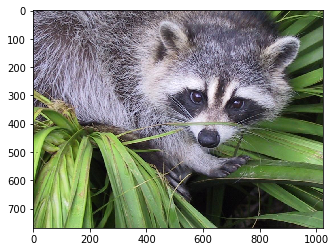

In [10]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [13]:
print(pic[:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [17]:
print(pic.max())
print(pic.min())
print(pic.mean())

255
0
110.16274388631184


### Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [49]:
pic = misc.face(gray=True)

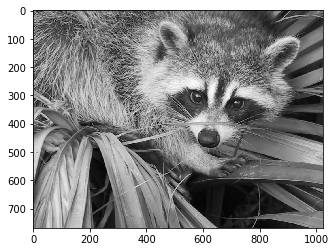

In [50]:
plt.imshow(pic, cmap='gray')

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [51]:
print(pic.shape)
h,w=pic.shape

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

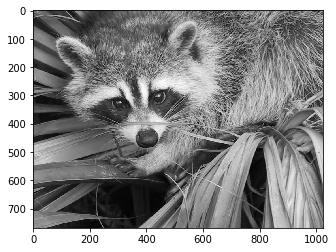

In [52]:
pic = np.fliplr(pic)
plt.imshow(pic, cmap='gray')

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

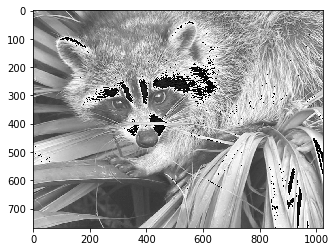

In [53]:
pic += 50
plt.imshow(pic, cmap='gray')

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $-$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $-$ округление до целой части.

In [62]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i, j, 0] = new_pic[i, j, 1] = new_pic[i, j, 2] = int(pic[i, j] / 200)

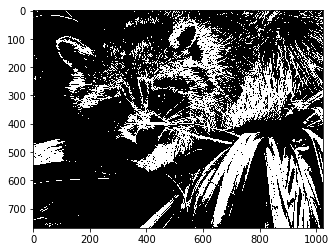

In [63]:
plt.imshow(new_pic)

### Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [64]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

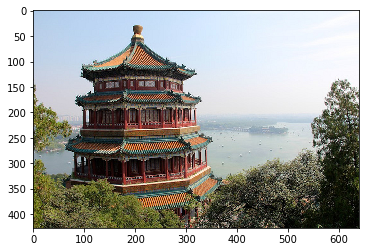

In [65]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [67]:
h, w, c = china.shape

Теперь давайте непосредственно перейдем к изменению картинки $-$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

100%|███████████████████████████████████████████████████████████████████████████████| 427/427 [00:00<00:00, 552.42it/s]


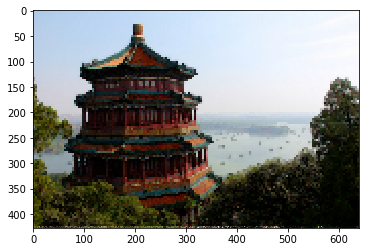

In [151]:
from copy import copy
compressed_pic_mean = copy(china)
for i in tqdm(range(h)):
    for j in range(w):
        if i % 4 == 0 and j % 4 == 0 and i < h - 3 and j < w - 3:
            tmp = np.zeros((4,4,3))
            for q in range(4):
                for p in range(4):
                    tmp[q, p] = compressed_pic_mean[i + q, j + p]
            mat_m = tmp.mean(axis=2)
            diff = np.abs(mat_m - t.mean())
            targ = tmp[np.unravel_index(diff.argmin(), diff.shape)]
            for q in range(4):
                for p in range(4):
                    compressed_pic_mean[i + q, j + p] = targ

plt.imshow(compressed_pic_mean)

100%|██████████████████████████████████████████████████████████████████████████████| 427/427 [00:00<00:00, 1672.35it/s]


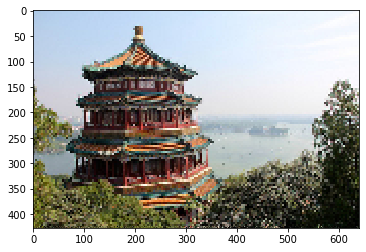

In [150]:
compressed_pic = copy(china)
for i in tqdm(range(h)):
    for j in range(w):
        if i % 4 == 0 and j % 4 == 0 and i < h - 3 and j < w - 3:
            for q in range(4):
                for p in range(4):
                    compressed_pic[i + q, j + p] = compressed_pic[i, j]
                    
plt.imshow(compressed_pic)

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [141]:
def calculate_mismatch(a,b):
    diff = abs(a - b)
    print(diff.sum())

In [153]:
calculate_mismatch(compressed_pic, china)

81044003


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

100%|██████████████████████████████████████████████████████████████████████████████| 427/427 [00:00<00:00, 1034.22it/s]


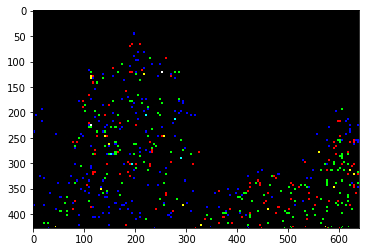

In [164]:
sin_pic = copy(compressed_pic_mean)
for i in tqdm(range(h)):
    for j in range(w):
        sin_pic[i, j] = np.sin(sin_pic[i, j])
                    
plt.imshow(sin_pic)

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [0]:
import librosa #импортируем библиотеку
import IPython.display

In [0]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [0]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [0]:
print(#тут ваш код)

    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

In [0]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [0]:
audio = #тут ваш код

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [0]:
audio = #тут ваш код

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [0]:
IPython.display.Audio(audio, rate=sr)